In [2]:
!pip install gym

  Running setup.py bdist_wheel for gym: started
  Running setup.py bdist_wheel for gym: finished with status 'done'
  Stored in directory: C:\Users\sethh\AppData\Local\pip\Cache\wheels\05\31\54\501ff9f64e6084bbcb75e600f257f3c628b19f0eaadc37162d
  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\sethh\AppData\Local\pip\Cache\wheels\8b\99\a0\81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built gym future


You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym==0.19.0

  Using cached https://files.pythonhosted.org/packages/a2/c5/a60adb848f86219d19dd2d2bc4223b80e8d42802cc9e816955b6cfeffbdb/stable_baselines-2.10.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/12/fe/80fb1c8e74e58dc9854f30dd5fed38038dc3c37208e8bb87fc01520d0499/gym_anytrading-1.2.0-py3-none-any.whl


  Could not find a version that satisfies the requirement gym==0.19.0 (from versions: 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.1.5, 0.1.6, 0.1.7, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.2.4, 0.2.5, 0.2.6, 0.2.7, 0.2.8, 0.2.9, 0.2.10, 0.2.11, 0.2.12, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.8, 0.4.9, 0.4.10, 0.5.0, 0.5.1, 0.5.2, 0.5.3, 0.5.4, 0.5.5, 0.5.6, 0.5.7, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.8.0.dev0, 0.8.0, 0.8.1, 0.8.2, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.10.0, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.10.5, 0.10.8, 0.10.9, 0.10.11, 0.11.0, 0.12.0, 0.12.1, 0.12.4, 0.12.5, 0.12.6, 0.13.0, 0.13.1, 0.14.0, 0.15.3, 0.15.4, 0.15.6, 0.15.7, 0.16.0, 0.17.0, 0.17.1, 0.17.2, 0.17.3)
No matching distribution found for gym==0.19.0
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
import gym
import gym_anytrading

import tensorflow as tf
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
tsla = pd.read_parquet("data/tsla_final2.parquet")

In [6]:
tsla.set_index('Date', inplace=True)

In [7]:
tsla

,Open,Close,polarity,subjectivity
Date,,,,
2015-01-02,44.574001,43.862000,0.125970,0.311480
2015-01-05,42.910000,42.018002,0.140373,0.292858
2015-01-06,42.012001,42.256001,0.084623,0.263115
2015-01-07,42.669998,42.189999,0.111555,0.247406
2015-01-08,42.562000,42.124001,0.088572,0.321711
...,...,...,...,...
2019-12-24,83.671997,85.050003,0.106086,0.378700
2019-12-26,85.582001,86.188004,0.101784,0.386978
2019-12-27,87.000000,86.075996,0.092933,0.376781


In [8]:
env = gym.make('stocks-v0', df=tsla)

In [9]:
env.signal_features

array([[43.86199951,  0.        ],
       [42.01800156, -1.84399796],
       [42.25600052,  0.23799896],
       ...,
       [86.0759964 , -0.11200714],
       [82.94000244, -3.13599396],
       [83.66600037,  0.72599792]])

In [10]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
        

info {'total_reward': -8.914024353027344, 'total_profit': 0.0068097980493609074, 'position': 1}


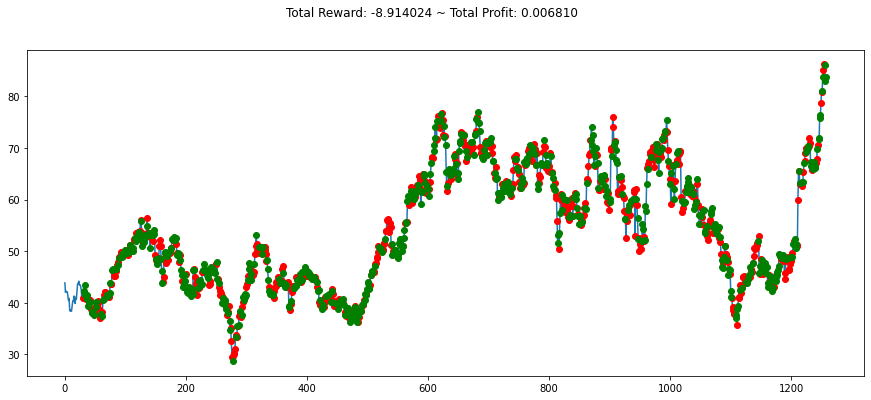

In [11]:
%matplotlib inline

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()